# Project Title : House Price Prediction using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. airline
2. source_city
3. departure_time
4. stops
5. arrival_time
6. destination_city
7. flight
## Ordinal :
8. class

## DISCRETE: 
9. days_left
10. price

## Continuous : 
11. duration


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.metrics import r2_score

In [9]:
import matplotlib.pyplot as plt

In [10]:
df=pd.read_excel("House_price.xlsx")


In [11]:
df

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4 rooms,4 bathroom,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
3,12215000.0,7500.0,4 rooms,2 bathroom,2.0,yes,no,no,yes,3.0,furnished
4,11410000.0,NaN,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...
527,1855000.0,2990.0,2 rooms,1 bathroom,1.0,no,no,no,no,1.0,unfurnished
528,1820000.0,NaN,2 rooms,1 bathroom,1.0,yes,no,no,no,2.0,unfurnished
529,1767150.0,2400.0,3 rooms,1 bathroom,1.0,no,no,no,no,0.0,semi-furnished
530,1750000.0,3620.0,2 rooms,1 bathroom,1.0,yes,no,no,no,0.0,unfurnished


In [12]:
df.isnull().sum()/len(df)

h_price             0.003759
area                0.030075
no_bedrooms         0.001880
no_bathrooms        0.001880
total_stories       0.003759
mainroad_loc        0.003759
guestroom           0.003759
hotwater            0.001880
airconditioner      0.003759
parking             0.001880
furnishingstatus    0.003759
dtype: float64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

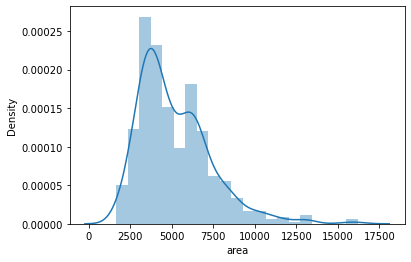

In [13]:
sns.distplot(df['area'])


In [14]:
median_val=df['area'].median()


In [15]:
df['area']=df['area'].fillna(median_val)

In [16]:
df

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4 rooms,4 bathroom,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
3,12215000.0,7500.0,4 rooms,2 bathroom,2.0,yes,no,no,yes,3.0,furnished
4,11410000.0,4600.0,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...
527,1855000.0,2990.0,2 rooms,1 bathroom,1.0,no,no,no,no,1.0,unfurnished
528,1820000.0,4600.0,2 rooms,1 bathroom,1.0,yes,no,no,no,2.0,unfurnished
529,1767150.0,2400.0,3 rooms,1 bathroom,1.0,no,no,no,no,0.0,semi-furnished
530,1750000.0,3620.0,2 rooms,1 bathroom,1.0,yes,no,no,no,0.0,unfurnished


In [17]:
df.isnull().sum()

h_price             2
area                0
no_bedrooms         1
no_bathrooms        1
total_stories       2
mainroad_loc        2
guestroom           2
hotwater            1
airconditioner      2
parking             1
furnishingstatus    2
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4 rooms,4 bathroom,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
3,12215000.0,7500.0,4 rooms,2 bathroom,2.0,yes,no,no,yes,3.0,furnished
4,11410000.0,4600.0,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...
527,1855000.0,2990.0,2 rooms,1 bathroom,1.0,no,no,no,no,1.0,unfurnished
528,1820000.0,4600.0,2 rooms,1 bathroom,1.0,yes,no,no,no,2.0,unfurnished
529,1767150.0,2400.0,3 rooms,1 bathroom,1.0,no,no,no,no,0.0,semi-furnished
530,1750000.0,3620.0,2 rooms,1 bathroom,1.0,yes,no,no,no,0.0,unfurnished


In [20]:
df.describe()

,h_price,area,total_stories,parking
count,5.280000e+02,528.000000,528.000000,528.000000
mean,4.775166e+06,5158.950758,1.803030,0.695076
std,1.873249e+06,2170.375340,0.864123,0.860152
min,1.750000e+06,1650.000000,1.000000,0.000000
25%,3.465000e+06,3600.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,4.000000,3.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 531
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   h_price           528 non-null    float64
 1   area              528 non-null    float64
 2   no_bedrooms       528 non-null    object 
 3   no_bathrooms      528 non-null    object 
 4   total_stories     528 non-null    float64
 5   mainroad_loc      528 non-null    object 
 6   guestroom         528 non-null    object 
 7   hotwater          528 non-null    object 
 8   airconditioner    528 non-null    object 
 9   parking           528 non-null    float64
 10  furnishingstatus  528 non-null    object 
dtypes: float64(4), object(7)
memory usage: 49.5+ KB


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

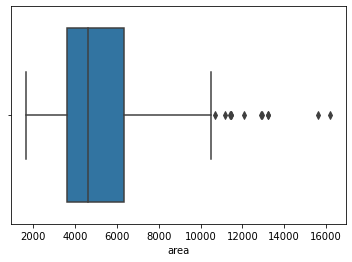

In [22]:
sns.boxplot(df['area'])

In [23]:
q1=df['area'].quantile(0.25)

In [24]:
q3=df['area'].quantile(0.75)

In [25]:
IQR=q3-q1

In [26]:
lower=q1-1.5*IQR

In [27]:
higher=q3+1.5*IQR

In [28]:
df=df[(df['area']>lower) & (df['area']<higher)]

In [29]:
df

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4 rooms,4 bathroom,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
3,12215000.0,7500.0,4 rooms,2 bathroom,2.0,yes,no,no,yes,3.0,furnished
4,11410000.0,4600.0,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...
527,1855000.0,2990.0,2 rooms,1 bathroom,1.0,no,no,no,no,1.0,unfurnished
528,1820000.0,4600.0,2 rooms,1 bathroom,1.0,yes,no,no,no,2.0,unfurnished
529,1767150.0,2400.0,3 rooms,1 bathroom,1.0,no,no,no,no,0.0,semi-furnished
530,1750000.0,3620.0,2 rooms,1 bathroom,1.0,yes,no,no,no,0.0,unfurnished


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parking'>

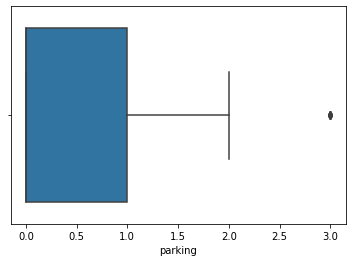

In [30]:
sns.boxplot(df['parking'])

In [31]:
q1=df['parking'].quantile(0.25)

In [32]:
q3=df['parking'].quantile(0.75)

In [33]:
IQR=q3-q1

In [34]:
lower=q1-1.5*IQR

In [35]:
higher=q3+1.5*IQR

In [36]:
df=df[(df['parking']>lower) & (df['parking']<higher)]

In [37]:
df

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
4,11410000.0,4600.0,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
5,10850000.0,7500.0,3 rooms,3 bathroom,1.0,yes,no,no,yes,2.0,semi-furnished
6,10150000.0,8580.0,4 rooms,3 bathroom,4.0,yes,no,no,yes,2.0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...
527,1855000.0,2990.0,2 rooms,1 bathroom,1.0,no,no,no,no,1.0,unfurnished
528,1820000.0,4600.0,2 rooms,1 bathroom,1.0,yes,no,no,no,2.0,unfurnished
529,1767150.0,2400.0,3 rooms,1 bathroom,1.0,no,no,no,no,0.0,semi-furnished
530,1750000.0,3620.0,2 rooms,1 bathroom,1.0,yes,no,no,no,0.0,unfurnished


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_stories'>

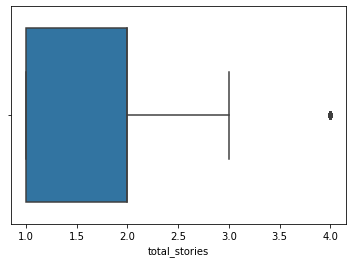

In [38]:
sns.boxplot(df['total_stories'])


In [39]:
q1=df['total_stories'].quantile(0.25)

In [40]:
q3=df['total_stories'].quantile(0.75)

In [41]:
IQR=q3-q1

In [42]:
lower=q1-1.5*IQR

In [43]:
higher=q3+1.5*IQR

In [44]:
df=df[(df['total_stories']>lower) & (df['total_stories']<higher)]

In [45]:
df

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
4,11410000.0,4600.0,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
5,10850000.0,7500.0,3 rooms,3 bathroom,1.0,yes,no,no,yes,2.0,semi-furnished
8,9870000.0,8100.0,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...
527,1855000.0,2990.0,2 rooms,1 bathroom,1.0,no,no,no,no,1.0,unfurnished
528,1820000.0,4600.0,2 rooms,1 bathroom,1.0,yes,no,no,no,2.0,unfurnished
529,1767150.0,2400.0,3 rooms,1 bathroom,1.0,no,no,no,no,0.0,semi-furnished
530,1750000.0,3620.0,2 rooms,1 bathroom,1.0,yes,no,no,no,0.0,unfurnished


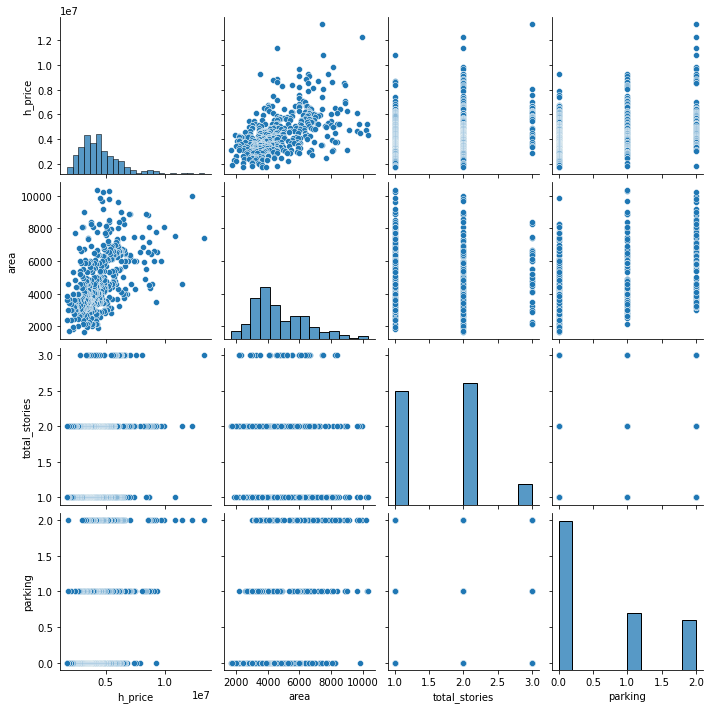

In [46]:
sns.pairplot(df)

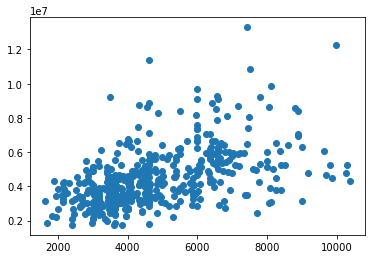

In [47]:
plt.scatter(df['area'],df['h_price'])

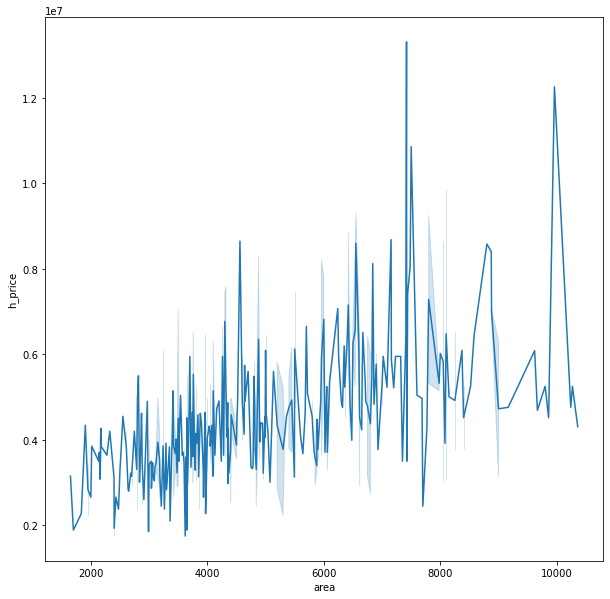

In [48]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df['area'],y=df['h_price'])
plt.show()

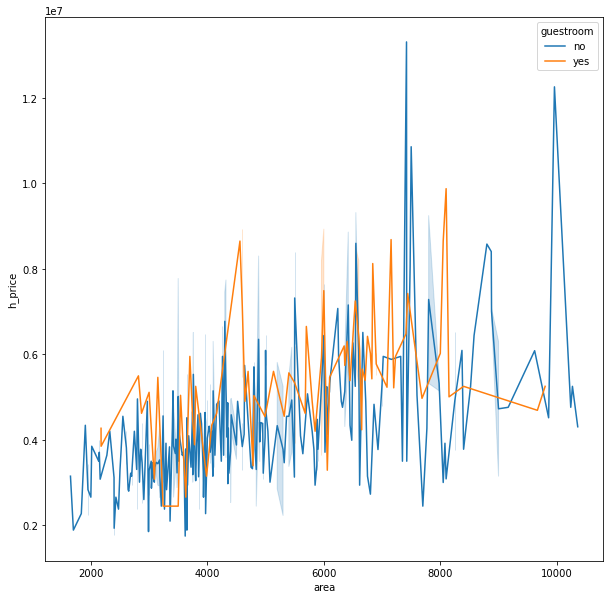

In [49]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df['area'],y=df['h_price'],hue=df['guestroom'])
plt.show()

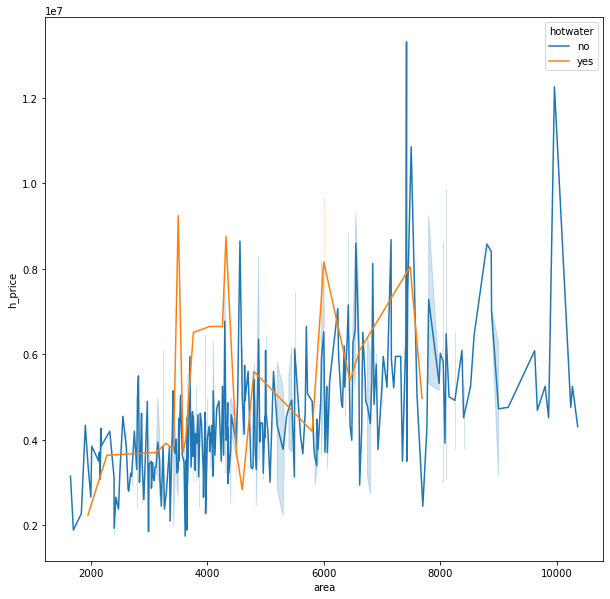

In [50]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df['area'],y=df['h_price'],hue=df['hotwater'])
plt.show()

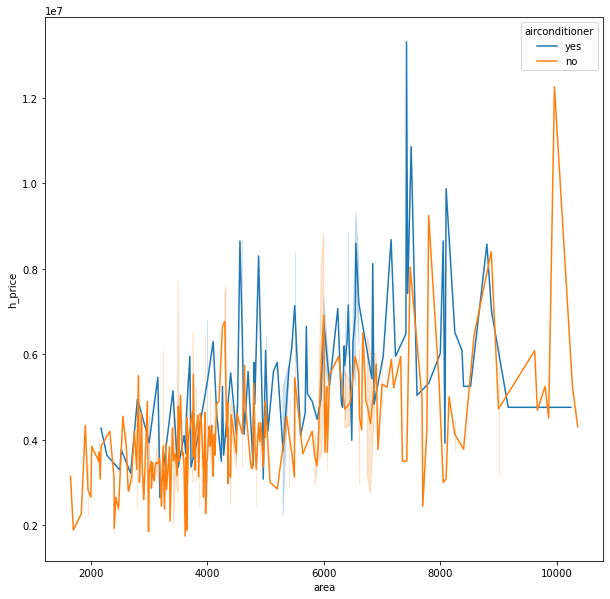

In [51]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df['area'],y=df['h_price'],hue=df['airconditioner'])
plt.show()

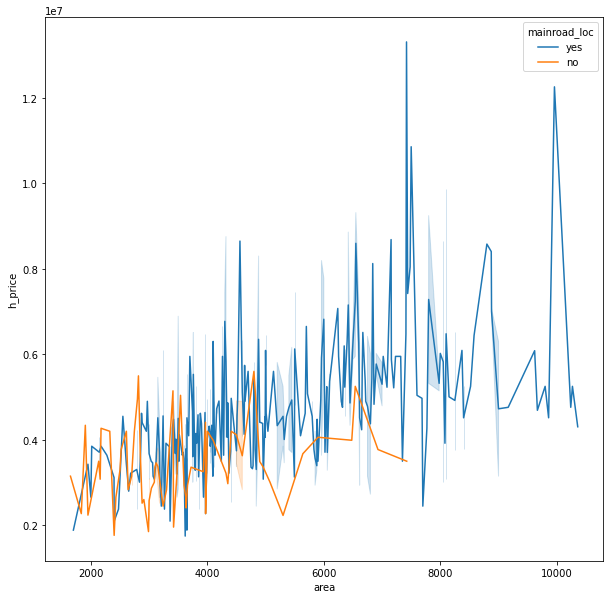

In [52]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df['area'],y=df['h_price'],hue=df['mainroad_loc'])
plt.show()

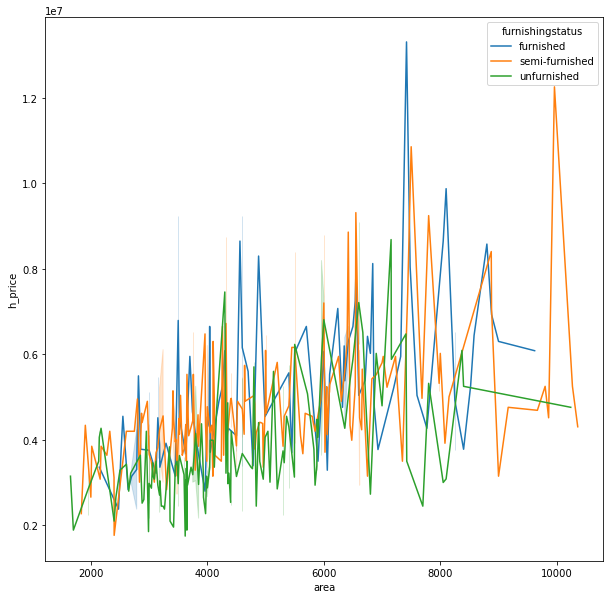

In [53]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df['area'],y=df['h_price'],hue=df['furnishingstatus'])
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airconditioner', ylabel='count'>

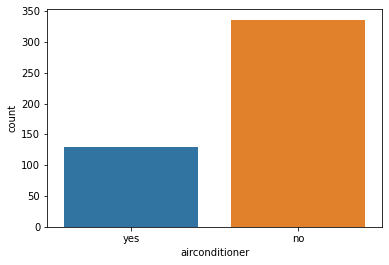

In [54]:
sns.countplot(df['airconditioner'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_bathrooms', ylabel='count'>

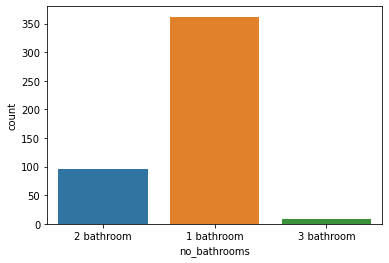

In [55]:
sns.countplot(df['no_bathrooms'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_bedrooms', ylabel='count'>

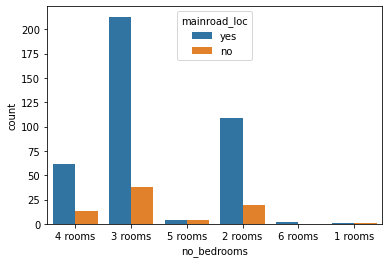

In [56]:
sns.countplot(df['no_bedrooms'],hue=df['mainroad_loc'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_bedrooms', ylabel='count'>

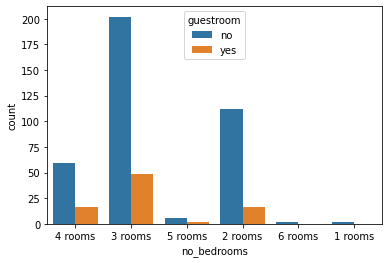

In [57]:
sns.countplot(df['no_bedrooms'],hue=df['guestroom'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_bedrooms', ylabel='count'>

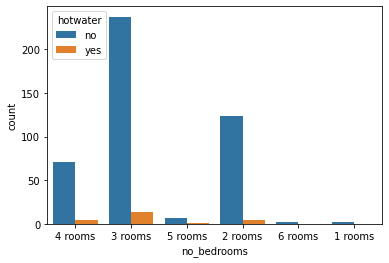

In [58]:
sns.countplot(df['no_bedrooms'],hue=df['hotwater'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_bedrooms', ylabel='count'>

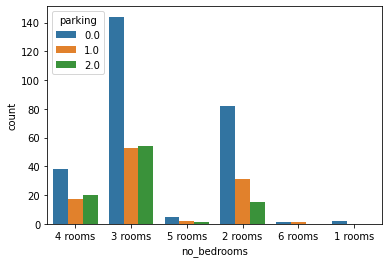

In [59]:
sns.countplot(df['no_bedrooms'],hue=df['parking'])

<AxesSubplot:xlabel='no_bedrooms', ylabel='h_price'>

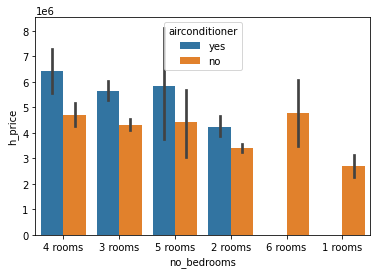

In [60]:
sns.barplot(x=df['no_bedrooms'],y=df['h_price'],data=df,hue=df['airconditioner'])

<AxesSubplot:xlabel='no_bedrooms', ylabel='h_price'>

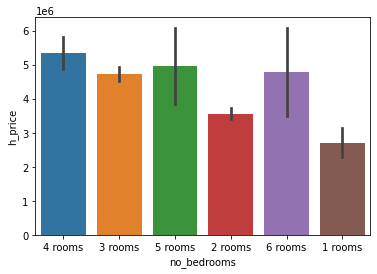

In [61]:
sns.barplot(x=df['no_bedrooms'],y=df['h_price'],data=df)

<AxesSubplot:xlabel='no_bathrooms', ylabel='h_price'>

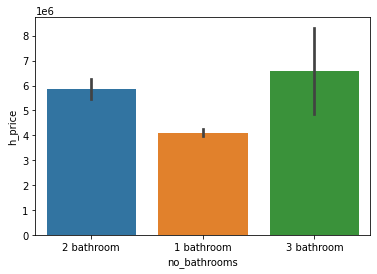

In [62]:
sns.barplot(x=df['no_bathrooms'],y=df['h_price'],data=df)

<AxesSubplot:xlabel='no_bedrooms', ylabel='h_price'>

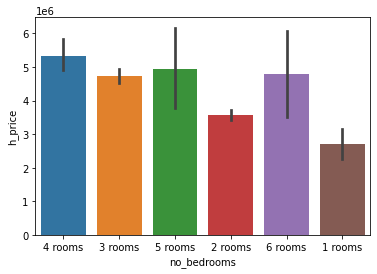

In [63]:
sns.barplot(x=df['no_bedrooms'],y=df['h_price'],data=df)

<AxesSubplot:xlabel='parking', ylabel='h_price'>

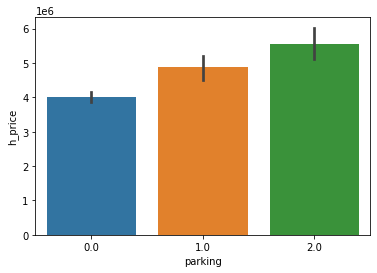

In [64]:
sns.barplot(x=df['parking'],y=df['h_price'])

<AxesSubplot:xlabel='parking', ylabel='h_price'>

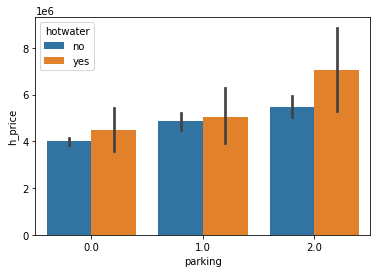

In [65]:
sns.barplot(x=df['parking'],y=df['h_price'],hue=df['hotwater'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mainroad_loc', ylabel='h_price'>

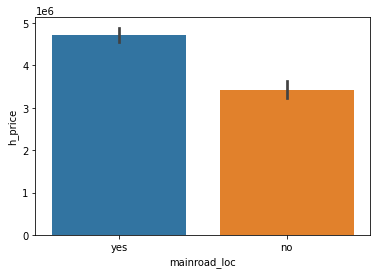

In [66]:
sns.barplot(df['mainroad_loc'],df['h_price'])

<AxesSubplot:xlabel='mainroad_loc', ylabel='h_price'>

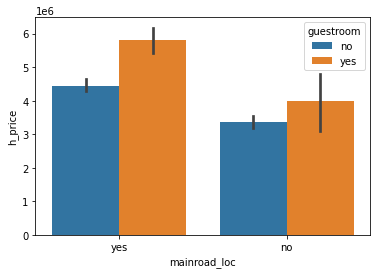

In [67]:
sns.barplot(x=df['mainroad_loc'],y=df['h_price'],hue=df['guestroom'])

<AxesSubplot:xlabel='mainroad_loc', ylabel='h_price'>

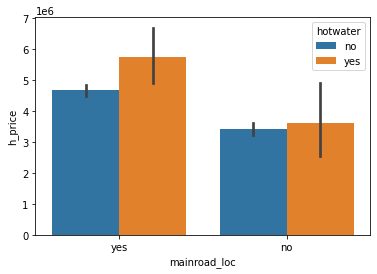

In [68]:
sns.barplot(x=df['mainroad_loc'],y=df['h_price'],hue=df['hotwater'])

<AxesSubplot:xlabel='mainroad_loc', ylabel='h_price'>

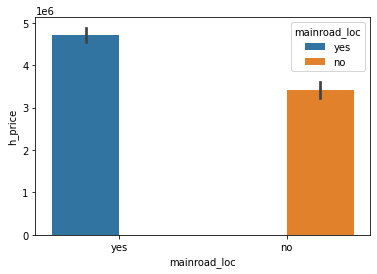

In [69]:
sns.barplot(x=df['mainroad_loc'],y=df['h_price'],hue=df['mainroad_loc'])

<AxesSubplot:xlabel='furnishingstatus', ylabel='h_price'>

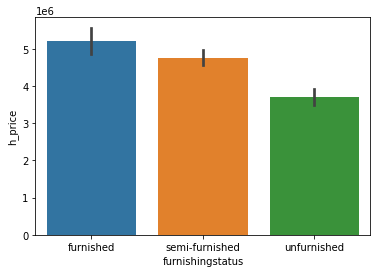

In [70]:
sns.barplot(x=df['furnishingstatus'],y=df['h_price'])

<AxesSubplot:xlabel='furnishingstatus', ylabel='h_price'>

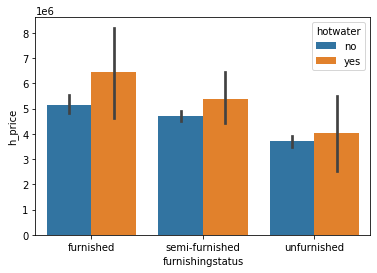

In [71]:
sns.barplot(x=df['furnishingstatus'],y=df['h_price'],hue=df['hotwater'])

<AxesSubplot:xlabel='furnishingstatus', ylabel='h_price'>

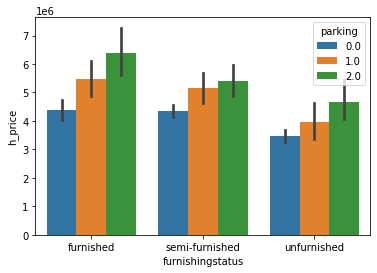

In [72]:
sns.barplot(x=df['furnishingstatus'],y=df['h_price'],hue=df['parking'])

<AxesSubplot:xlabel='furnishingstatus', ylabel='h_price'>

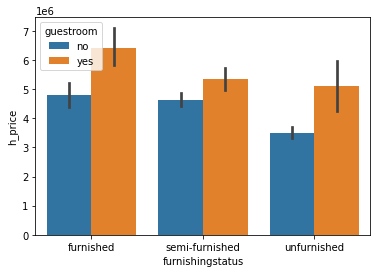

In [73]:
sns.barplot(x=df['furnishingstatus'],y=df['h_price'],hue=df['guestroom'])

<AxesSubplot:xlabel='furnishingstatus', ylabel='h_price'>

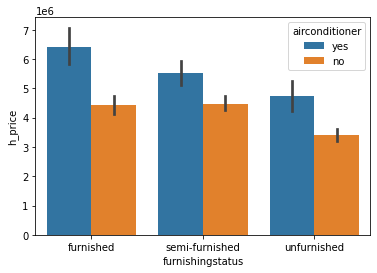

In [74]:
sns.barplot(x=df['furnishingstatus'],y=df['h_price'],hue=df['airconditioner'])

In [75]:
df

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
4,11410000.0,4600.0,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
5,10850000.0,7500.0,3 rooms,3 bathroom,1.0,yes,no,no,yes,2.0,semi-furnished
8,9870000.0,8100.0,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...
527,1855000.0,2990.0,2 rooms,1 bathroom,1.0,no,no,no,no,1.0,unfurnished
528,1820000.0,4600.0,2 rooms,1 bathroom,1.0,yes,no,no,no,2.0,unfurnished
529,1767150.0,2400.0,3 rooms,1 bathroom,1.0,no,no,no,no,0.0,semi-furnished
530,1750000.0,3620.0,2 rooms,1 bathroom,1.0,yes,no,no,no,0.0,unfurnished


<AxesSubplot:xlabel='no_bathrooms', ylabel='h_price'>

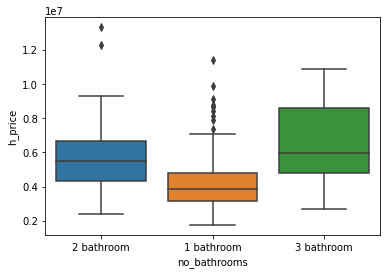

In [76]:
sns.boxplot(x=df['no_bathrooms'],y=df['h_price'])

<AxesSubplot:xlabel='no_bathrooms', ylabel='h_price'>

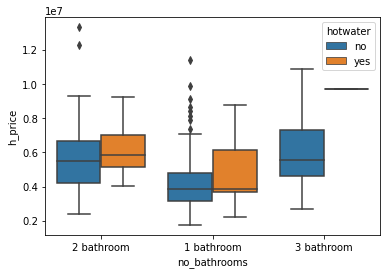

In [77]:
sns.boxplot(x=df['no_bathrooms'],y=df['h_price'],hue=df['hotwater'])

<AxesSubplot:xlabel='no_bathrooms', ylabel='h_price'>

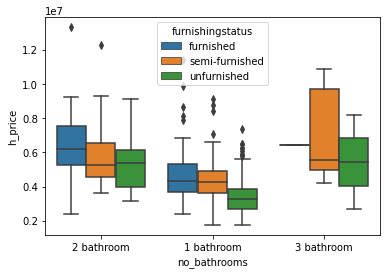

In [78]:
sns.boxplot(x=df['no_bathrooms'],y=df['h_price'],hue=df['furnishingstatus'])

<AxesSubplot:xlabel='no_bedrooms', ylabel='h_price'>

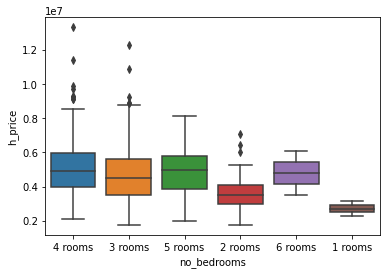

In [79]:
sns.boxplot(x=df['no_bedrooms'],y=df['h_price'])

<AxesSubplot:xlabel='no_bedrooms', ylabel='h_price'>

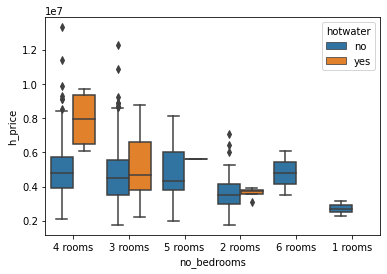

In [80]:
sns.boxplot(x=df['no_bedrooms'],y=df['h_price'],hue=df['hotwater'])

<AxesSubplot:xlabel='parking', ylabel='h_price'>

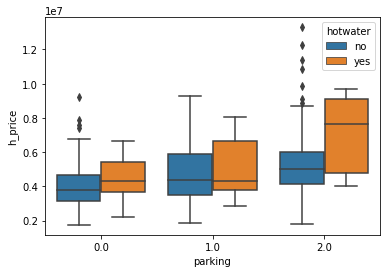

In [81]:
sns.boxplot(x=df['parking'],y=df['h_price'],hue=df['hotwater'])

<AxesSubplot:xlabel='parking', ylabel='h_price'>

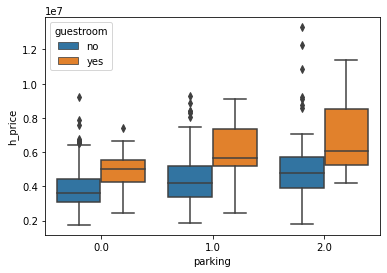

In [82]:
sns.boxplot(x=df['parking'],y=df['h_price'],hue=df['guestroom'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

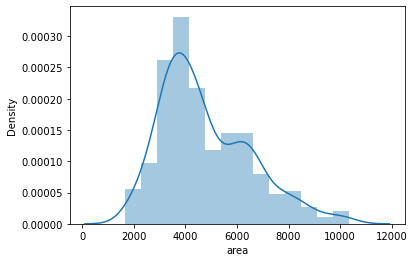

In [83]:
sns.distplot(df['area'])

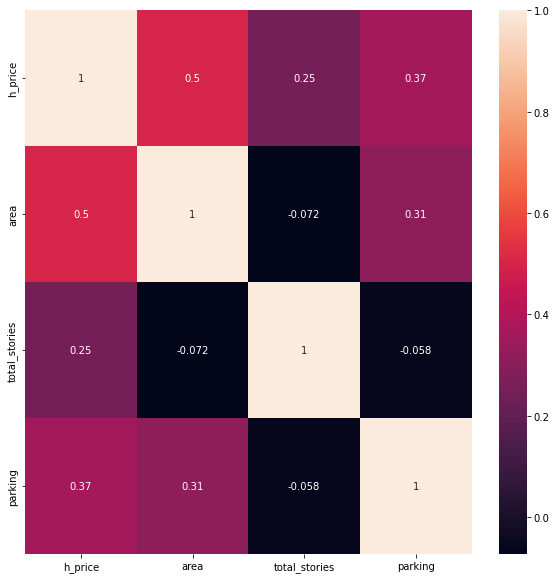

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [85]:
le=LabelEncoder()


In [86]:
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_8320\4240775138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])


In [87]:
df['airconditioner']=le.fit_transform(df['airconditioner'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_8320\3106140806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airconditioner']=le.fit_transform(df['airconditioner'])


In [88]:
df['hotwater']=le.fit_transform(df['hotwater'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_8320\597219027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hotwater']=le.fit_transform(df['hotwater'])


In [89]:
df['guestroom']=le.fit_transform(df['guestroom'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_8320\1039187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['guestroom']=le.fit_transform(df['guestroom'])


In [90]:
df['mainroad_loc']=le.fit_transform(df['mainroad_loc'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_8320\153857674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mainroad_loc']=le.fit_transform(df['mainroad_loc'])


In [91]:
df['no_bedrooms']=le.fit_transform(df['no_bedrooms'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_8320\2205610439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_bedrooms']=le.fit_transform(df['no_bedrooms'])


In [92]:
df['no_bathrooms']=le.fit_transform(df['no_bathrooms'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_8320\3468444091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_bathrooms']=le.fit_transform(df['no_bathrooms'])


In [93]:
df

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,3,1,3.0,1,0,0,1,2.0,0
2,12250000.0,9960.0,2,1,2.0,1,0,0,0,2.0,1
4,11410000.0,4600.0,3,0,2.0,1,1,0,1,2.0,0
5,10850000.0,7500.0,2,2,1.0,1,0,0,1,2.0,1
8,9870000.0,8100.0,3,0,2.0,1,1,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
527,1855000.0,2990.0,1,0,1.0,0,0,0,0,1.0,2
528,1820000.0,4600.0,1,0,1.0,1,0,0,0,2.0,2
529,1767150.0,2400.0,2,0,1.0,0,0,0,0,0.0,1
530,1750000.0,3620.0,1,0,1.0,1,0,0,0,0.0,2


In [94]:
y=df['h_price']

In [95]:
X=df.drop('h_price',axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
X_train.shape

(312, 10)

In [98]:
X_test.shape

(154, 10)

In [99]:
sc=StandardScaler()

In [100]:
X=sc.fit_transform(X)


In [101]:
X

array([[ 1.50230751,  1.443852  ,  1.63107664, ...,  1.6076739 ,
         1.75993412, -1.48060842],
       [ 2.94764952,  0.1008679 ,  1.63107664, ..., -0.62201669,
         1.75993412, -0.14346981],
       [-0.10236354,  1.443852  , -0.51604685, ...,  1.6076739 ,
         1.75993412, -1.48060842],
       ...,
       [-1.35423457,  0.1008679 , -0.51604685, ..., -0.62201669,
        -0.77132915, -0.14346981],
       [-0.66001518, -1.24211619, -0.51604685, ..., -0.62201669,
        -0.77132915,  1.1936688 ],
       [-0.52913775,  0.1008679 , -0.51604685, ..., -0.62201669,
        -0.77132915,  1.1936688 ]])

In [102]:
lr=LinearRegression()


In [103]:
lr.fit(X_train,y_train)

LinearRegression()

In [104]:
y_pred=lr.predict(X_test)


In [105]:
y_pred

array([5126012.58003649, 5667357.50701784, 6585983.24843083,
       2443301.19965266, 5417964.00311946, 3116000.79693412,
       4009824.649128  , 4983114.75787484, 5012555.66048528,
       2761414.80022098, 6013577.73216514, 5721372.45451443,
       3391176.86263656, 6367439.82073818, 3212348.7386764 ,
       4659087.41053241, 2839090.35606882, 4623033.51641846,
       5150527.61149416, 5455645.88174286, 7354879.49904573,
       6150509.90725248, 6837592.39822046, 4456004.06677191,
       5401484.06071111, 3628465.37409163, 3413970.03481124,
       5005186.54210952, 5030201.95425232, 4582130.16915116,
       2967224.3240566 , 3204795.85156701, 3938837.32282654,
       6166344.88344437, 7533921.85828407, 5305575.64371611,
       5871791.75249818, 5252168.47889777, 4785154.71059683,
       3614467.79902623, 5447552.37142455, 6448590.25508687,
       4500637.98336033, 5171207.98466715, 3528699.42437746,
       3912792.30899626, 3421962.31542954, 2986227.17900944,
       3211164.91184948,

In [106]:
r2_score(y_test,y_pred)

0.6355846851382929